# **Direct Methods for the solution of Linear Systems**

**Esercizio 1**
Given a matrix A ∈ R
n×n and the vector xtrue = (1, 1, . . . , 1)T ∈ R
n, write a script that:

• Computes the right-hand side of the linear system b = Axtrue.

• Computes the condition number in 2-norm of the matrix A. It is ill-conditioned? What if we use
the ∞-norm instead of the 2-norm?

• Solves the linear system Ax = b with the function np.linalg.solve().

• Computes the relative error between the solution computed before and the true solution xtrue.
Remember that the relative error between xtrue and x in R
n can be computed as

E(xtrue, x) = ||x − xtrue||2
||xtrue||2

• Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new
window) the condition number in 2-norm K2(A) and in ∞-norm, as a function of n.


In [104]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
A = np.random.randn(N, N)
x_true = np.ones(N)

# Compute b
b = A@x_true

# Compute condition number
cond = np.linalg.cond(A, 2)
cond_inf = np.linalg.cond(A, np.Inf)

print(f"Condition with norm 2: {cond}")
print(f"Condition with norm inf: {cond_inf}")

if cond > 10e6:
    print("A ill-conditioned")
else:
    print("A not ill-conditioned")

# Solve system Ax=b
x = np.linalg.solve(A, b)
print(f"Computed x: {x}")   

# Relative error
rel_err = np.linalg.norm(x - x_true, 2)/np.linalg.norm(x_true)
print(f"Relative error: {rel_err}")




Condition with norm 2: 6.509997688492345
Condition with norm inf: 14.178912325891016
A not ill-conditioned
Computed x: [1. 1. 1. 1.]
Relative error: 1.1102230246251565e-16


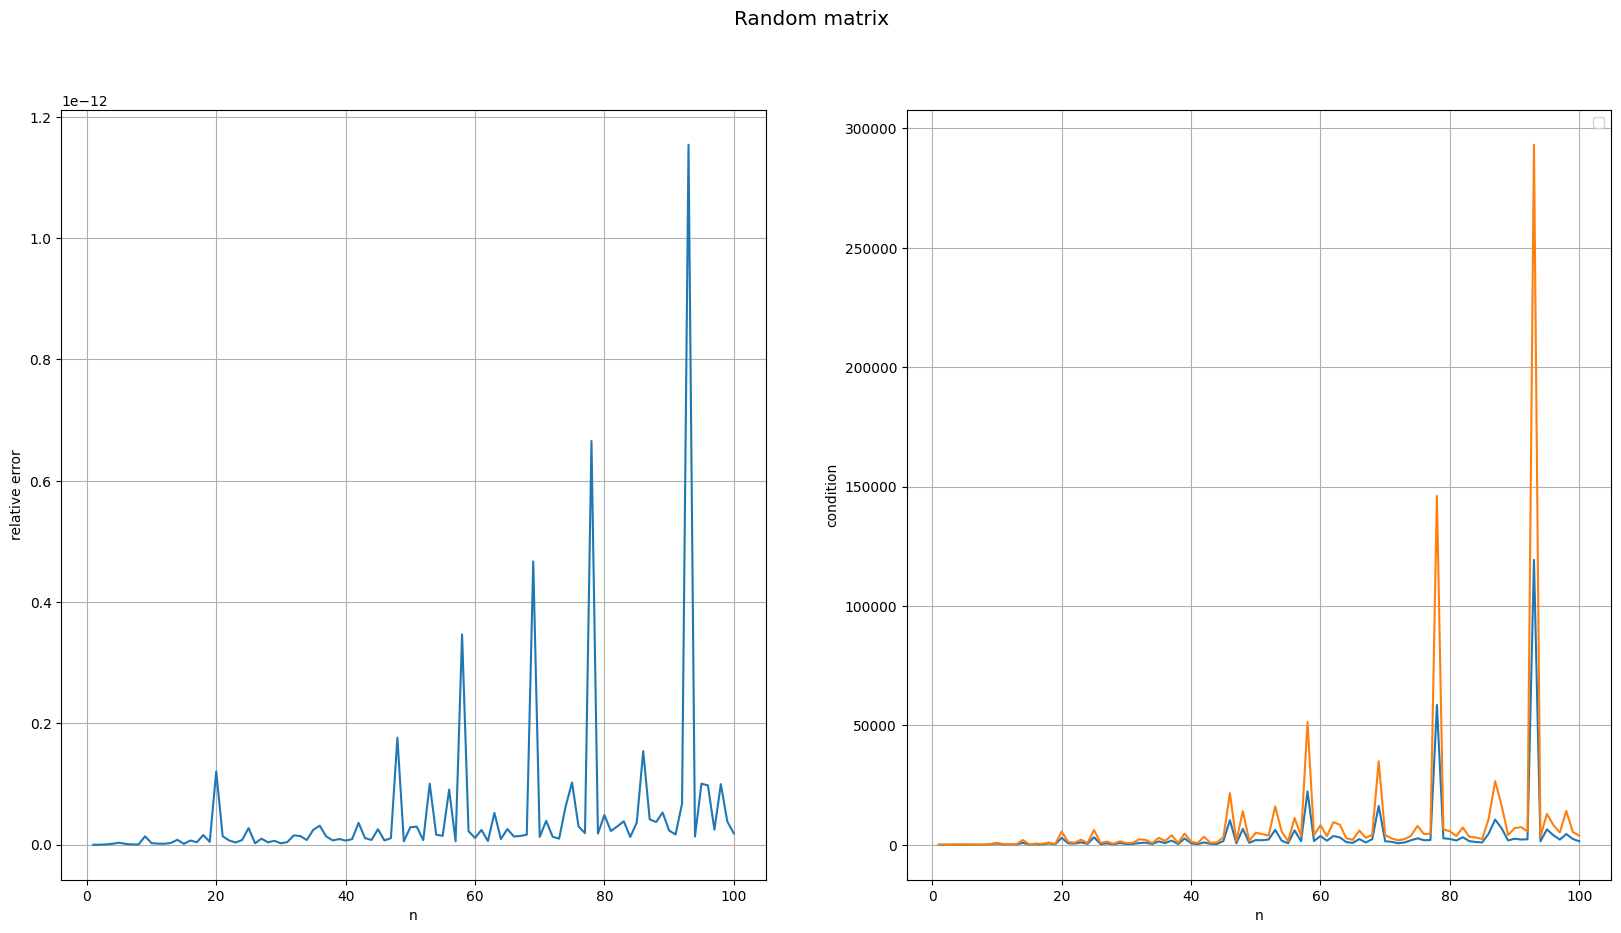

In [105]:
def compute(N):
    A = np.random.rand(N, N)
    x_true = np.ones(N)

    # Compute b
    b = A@x_true

    # Compute condition number
    cond = np.linalg.cond(A, 2)
    cond_inf = np.linalg.cond(A, np.Inf)

    # Solve system Ax=b
    x = np.linalg.solve(A, b)
    # Relative error
    rel_err = np.linalg.norm(x - x_true, 2)/np.linalg.norm(x_true)

    return rel_err, cond, cond_inf


def plot_data(data, n_vector, title=""):
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(title, fontsize="x-large")
    plt.subplot(1, 2, 1)
    plt.plot(n_vector, data["err_rel"], )
    plt.xlabel("n")
    plt.ylabel("relative error")
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.xlabel("n")
    plt.ylabel("condition")
    plt.legend(["Cond 2", ["Cond inf"]])
    plt.plot(n_vector, data["cond"])
    plt.plot(n_vector, data["cond_inf"])
    plt.grid()

n = 100

n_vector = np.arange(1, n+1, 1)
data = {"err_rel": [], "cond": [], "cond_inf": []}
for i in range(1, n+1, 1):
    computed = compute(i)
    data["err_rel"].append(computed[0])
    data["cond"].append(computed[1])
    data["cond_inf"].append(computed[2])

plot_data(data, n_vector, title="Random matrix")


**Esercizio 2**
Test the program above with the following choices of A ∈ R
n×n:

• A random matrix (created with the function np.random.rand()) with size varying with n =
{10, 20, 30, . . . , 100}.

• The Vandermonde matrix (np.vander) of dimension n = {5, 10, 15, 20, 25, 30} with respect to the
vector x = {1, 2, 3, . . . , n}.

• The Hilbert matrix (scipy.linalg.hilbert) of dimension n = {4, 5, 6, . . . , 12}

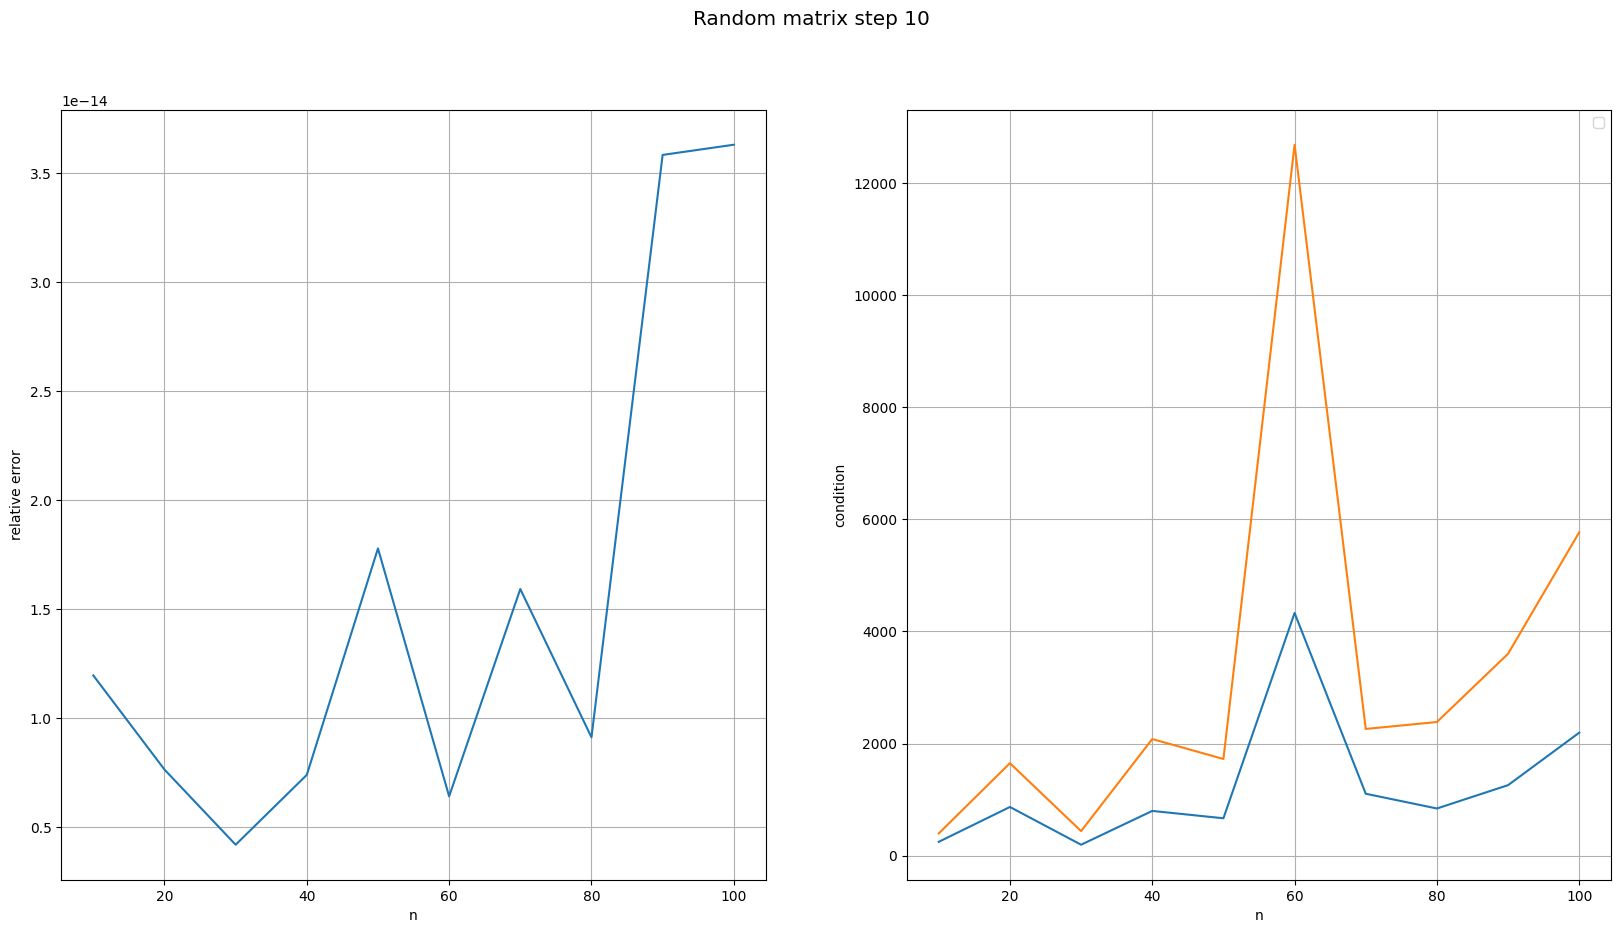

In [106]:

n = 100
n_vector = np.arange(10, n+1, 10)
data = {"err_rel": [], "cond": [], "cond_inf": []}
for i in range(10, n+1, 10):
    computed = compute(i)
    data["err_rel"].append(computed[0])
    data["cond"].append(computed[1])
    data["cond_inf"].append(computed[2])

plot_data(data, n_vector, "Random matrix step 10")



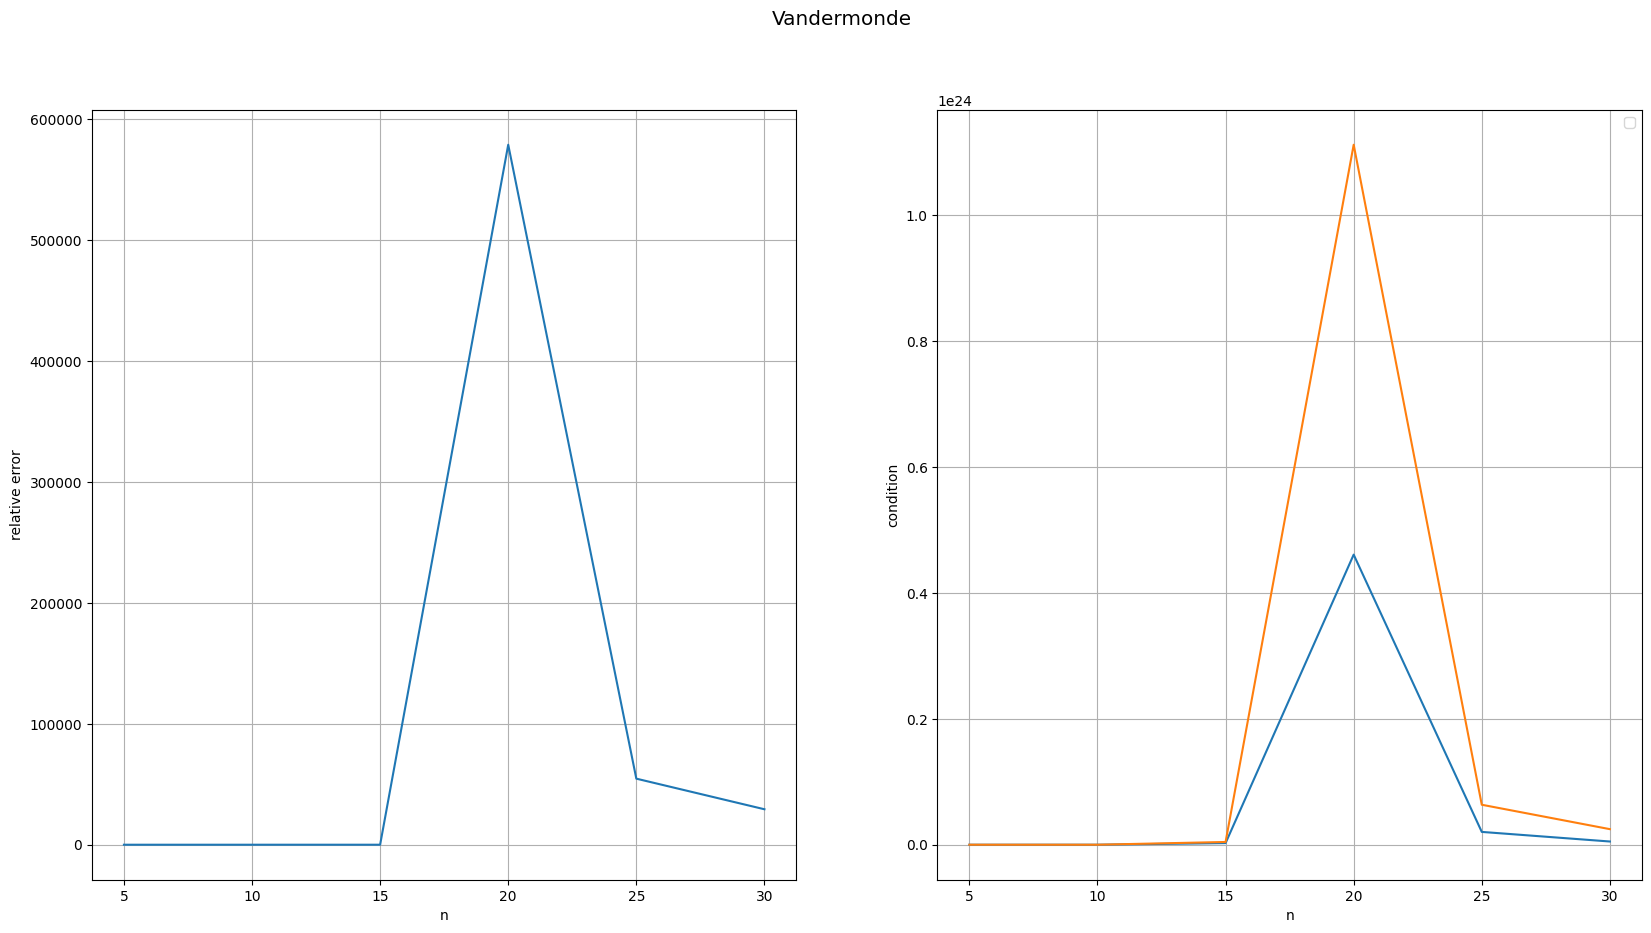

In [107]:
def compute2(A, x_true):
    # Compute b
    b = A@x_true

    # Compute condition number
    cond = np.linalg.cond(A, 2)
    cond_inf = np.linalg.cond(A, np.Inf)

    # Solve system Ax=b
    x = np.linalg.solve(A, b)
    # Relative error
    rel_err = np.linalg.norm(x - x_true, 2)/np.linalg.norm(x_true)

    return rel_err, cond, cond_inf

dim = np.arange(5, 31, 5)

data_vander = {"err_rel": [], "cond": [], "cond_inf": []}

for i in dim:
    x_true = np.ones(i)
    x_vander = np.arange(1, i+1)
    V = np.vander(x_vander)
    computed = compute2(V, x_true)
    data_vander["err_rel"].append(computed[0])
    data_vander["cond"].append(computed[1])
    data_vander["cond_inf"].append(computed[2])

plot_data(data_vander, dim, title="Vandermonde")


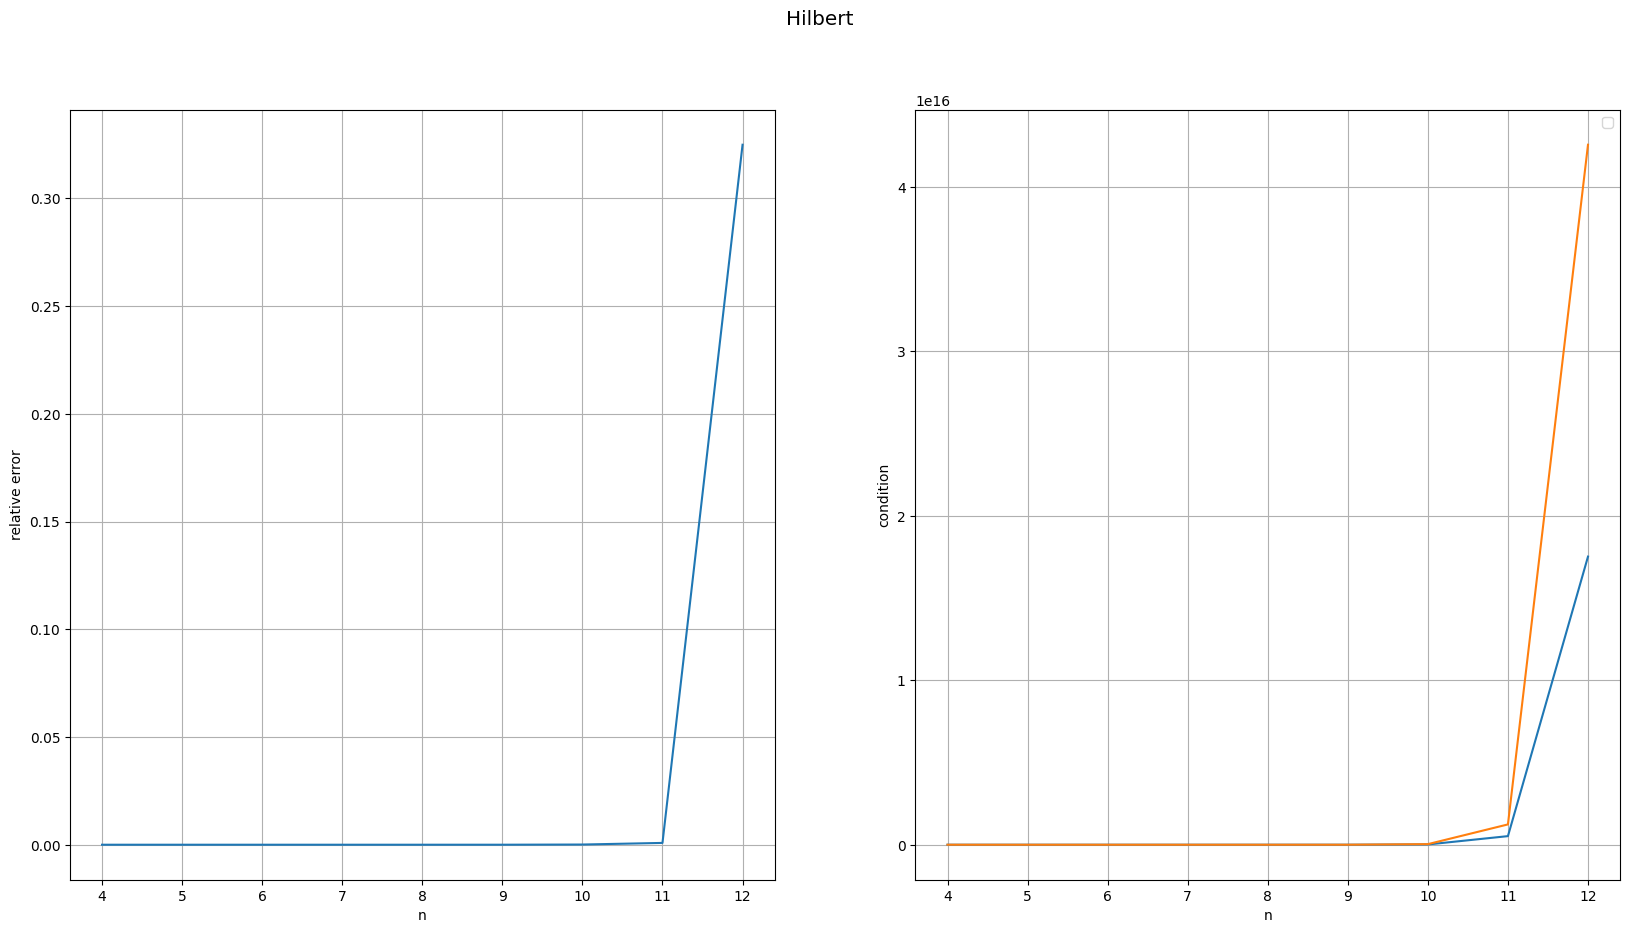

In [108]:
import scipy as sp

dim = np.arange(4, 13, 1)
data_hilbert = {"err_rel": [], "cond": [], "cond_inf": []}

for i in dim:
    x_true = np.ones(i)
    x_hilbert = np.arange(1, i+1)
    H = sp.linalg.hilbert(i)
    computed = compute2(H, x_true)
    data_hilbert["err_rel"].append(computed[0])
    data_hilbert["cond"].append(computed[1])
    data_hilbert["cond_inf"].append(computed[2])

plot_data(data_hilbert, dim, title="Hilbert")


# **Floating Point Arithmetic**

**Esercizio 1**
The Machine epsilon eps is the distance between 1 and the next floating point number. Compute eps, which
is defined as the smallest floating point number such that it holds:

fl(1 + eps) > 1

Tips: use a while structure

In [109]:
x = 1
eps = 1
old = 1
while x+eps > 1:
    old = eps
    eps /= 2

print(old)


2.220446049250313e-16


**Esercizio 2**
 Let’s consider the sequence an = (1 + 1
n
)
n. It is well known that:

limn→∞
an = e

where e is the Euler costant. Choose different values for n, compute an and compare it to the real
value of the Euler costant. What happens if you choose a large value of n? Guess the reason.

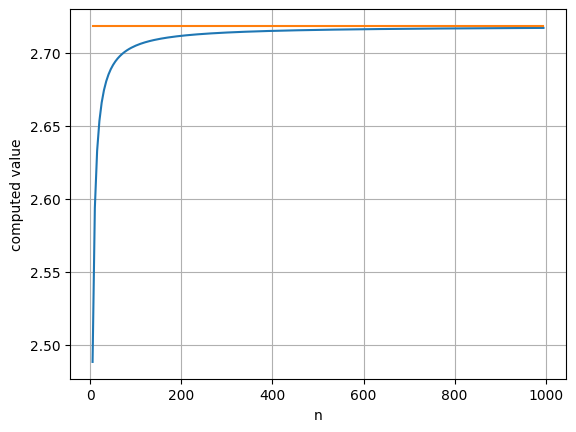

In [110]:
def euler(n):
    return (1 + 1/n)**n


n_euler = np.arange(5, 1000, 5)
data_euler = []
for i in n_euler:
    data_euler.append(euler(i))
plt.plot(n_euler, data_euler)
plt.plot(n_euler, [np.e]*n_euler.shape[0])
plt.xlabel("n")
plt.ylabel("computed value")
plt.grid()
plt.show()

**Esercizio 3**
 Let’s consider the matrices:

A =
[[4,2],
[1,3]]

B =[[
4,2],[
2,1]]

Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? Can you infer
some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate
your deduction with other examples.
Tips: Please, have a look at np.linalg.

In [111]:
A = [[4, 2], [1, 3]]
B = [[4, 2], [2, 1]]

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

eig_A = np.linalg.eigvals(A)
eig_B = np.linalg.eigvals(B)

print(f"Rank of A: {rank_A}")
print(f"Rank of B: {rank_B}")

print(f"Eig of A: {eig_A}")
print(f"Eig of B: {eig_B}")

Rank of A: 2
Rank of B: 1
Eig of A: [5. 2.]
Eig of B: [5. 0.]


The rank of a squared matrix is equal to the number of eigenvalues differents from 0

Let A = $\begin{pmatrix}
1 & 2 \\
0 & 1 
\end{pmatrix}$

We have two eigenvalues $\lambda_1 = \lambda_2=1$
The matrix rank is equal to 2

On the other hand if we take

B = $\begin{pmatrix}
2 & 2 \\
1 & 1 
\end{pmatrix}$

We have $\lambda_1=0,\lambda_2=3$

The rank of the matrix is equal to the numbers of non-zero eigenvalues, so it is 1